In [42]:
from pyexpat import model
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(4,16),
    nn.ReLU(),
    nn.Linear(16,32),
    nn.ReLU()
)
model

Sequential(
  (0): Linear(in_features=4, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=32, bias=True)
  (3): ReLU()
)

In [43]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)
torch.manual_seed(1)

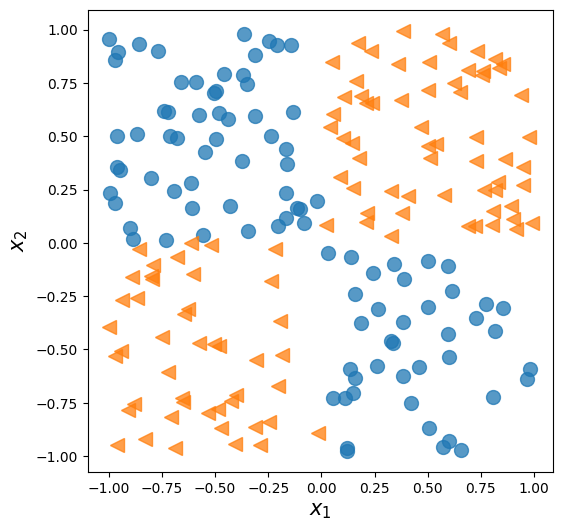

In [44]:
np.random.seed(1)
x = np.random.uniform(low = -1, high = 1, size = (200,2))
y = np.ones(len(x))
y[x[:,0]*x[:,1]<0] = 0
n_train = 100
x_train = torch.tensor(x[:n_train, :], dtype =torch.float32)
y_train = torch.tensor(y[:n_train], dtype = torch.float32)
x_valid = torch.tensor(x[n_train:, :], dtype = torch.float32)
y_valid = torch.tensor(y[n_train:], dtype = torch.float32)
fig = plt.figure(figsize = (6,6))
plt.plot(x[y==0,0], x[y==0,1], 'o', alpha = 0.75, markersize = 10)
plt.plot(x[y ==1, 0], x[y==1,1], '<',alpha = 0.75, markersize = 10)
plt.xlabel('$x_1$', size = 15)
plt.ylabel('$x_2$', size = 15)
plt.show()

In [57]:
model = nn.Sequential(
    nn.Linear(2,1),
    nn.Sigmoid()
)
model
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

In [58]:
from torch import Tensor
from torch.utils.data import DataLoader, TensorDataset
train_ds = TensorDataset(x_train, y_train)
batch_size = 2
torch.manual_seed(1)
train_dl = DataLoader(train_ds, batch_size, shuffle = True)


In [59]:
torch.manual_seed(1)
epochs = 200
def train(model, epochs, train_dl, x_valid, y_valid):
    loss_hist_train = [0]*epochs
    accuracy_hist_train = [0]*epochs
    loss_hist_valid = [0]* epochs
    accuracy_hist_valid = [0]*epochs

    for epoch in range(epochs):
        for x_batch, y_batch in train_dl:
            pred  = model(x_batch)[:,0]
            loss = loss_fn(pred, y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            loss_hist_train[epoch] += loss.item()
            is_correct = ((pred >= 0.5).float() == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.mean()
        loss_hist_train[epoch] /= n_train / batch_size
        accuracy_hist_train[epoch] /= n_train/batch_size
        pred = model(x_valid)[:,0]
        loss = loss_fn(pred, y_valid)
        loss_hist_valid[epoch] = loss.item()
        is_correct = ((pred >= 0.5).float() == y_valid).float()
        accuracy_hist_valid[epoch] += is_correct.mean()
    return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid

history = train(model, epochs, train_dl, x_valid, y_valid)

Text(0.5, 0, 'Epochs')

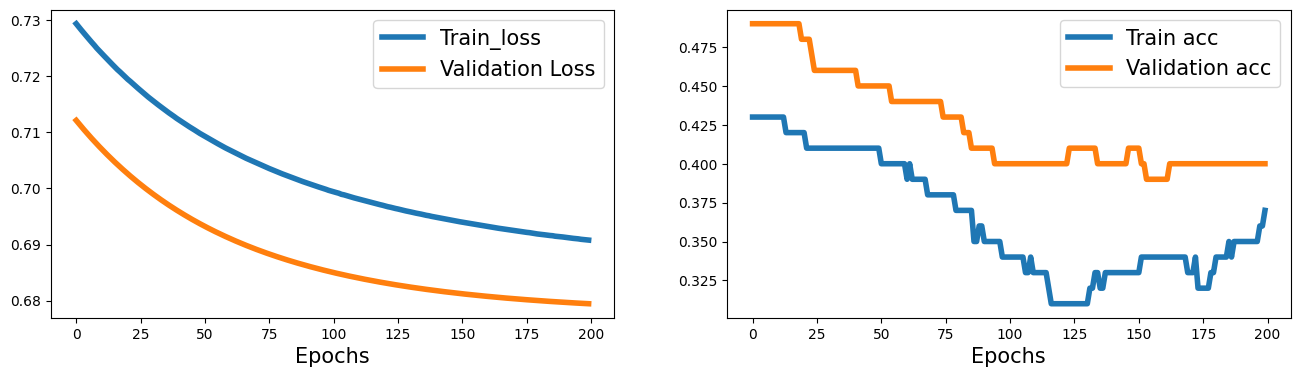

In [60]:
fig = plt.figure(figsize = (16,4))
ax = fig.add_subplot(1,2,1)
plt.plot(history[0], lw = 4)
plt.plot(history[1], lw = 4)
plt.legend(['Train_loss', 'Validation Loss'], fontsize = 15)
ax.set_xlabel('Epochs', fontsize= 15)
ax = fig.add_subplot(1,2,2)
plt.plot(history[2], lw = 4)
plt.plot(history[3], lw = 4)
plt.legend(['Train acc', 'Validation acc'], fontsize = 15)
ax.set_xlabel('Epochs', fontsize = 15)

In [61]:
model = nn.Sequential(
    nn.Linear(2,4),
    nn.ReLU(),
    nn.Linear(4,4),
    nn.ReLU(),
    nn.Linear(4,1),
    nn.Sigmoid()
)
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
model
epochs = 200
history = train(model, epochs, train_dl, x_valid, y_valid)


Text(0.5, 0, 'Epochs')

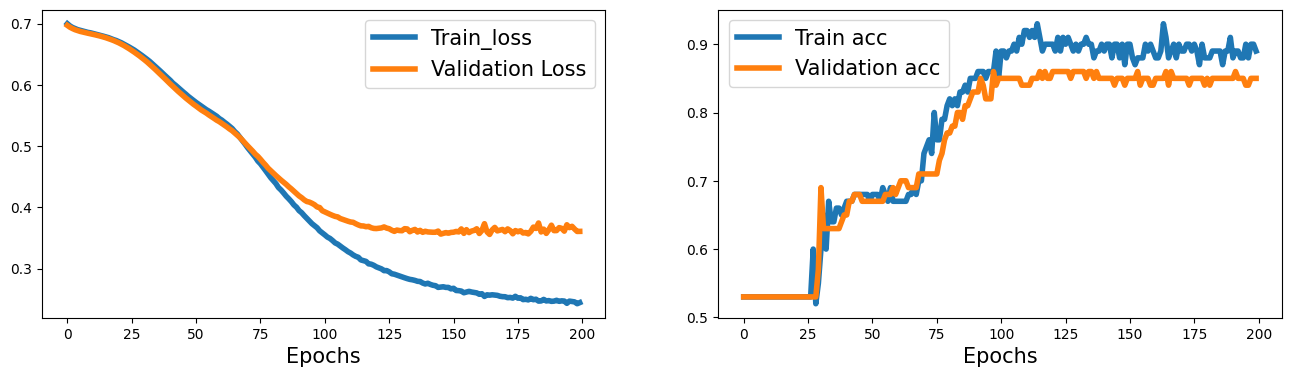

In [62]:
fig = plt.figure(figsize = (16,4))
ax = fig.add_subplot(1,2,1)
plt.plot(history[0], lw = 4)
plt.plot(history[1], lw = 4)
plt.legend(['Train_loss', 'Validation Loss'], fontsize = 15)
ax.set_xlabel('Epochs', fontsize= 15)
ax = fig.add_subplot(1,2,2)
plt.plot(history[2], lw = 4)
plt.plot(history[3], lw = 4)
plt.legend(['Train acc', 'Validation acc'], fontsize = 15)
ax.set_xlabel('Epochs', fontsize = 15)

In [63]:
#using nn.MOdeule

class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        l1 = nn.Linear(2,4)
        a1 = nn.ReLU()
        l2 = nn.Linear(4,4)
        a2 = nn.ReLU()
        l3 = nn.Linear(4,1)
        a3 = nn.Sigmoid()
        l = [l1, a1, l2, a2, l3, a3]
        self.module_list = nn.ModuleList(l)
    def forward(self, x):
        for f in self.module_list:
            x = f(x)
        return x
    def  predict(self, x):
        x = torch.tensor(x, dtype = torch.float32)
        pred = self.forward(x)[:,0]
        return (pred >=0.5).float()
    
model = MyModule()
model

loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr= 0.015)
history = train(model, epochs, train_dl, x_valid, y_valid)

/var/folders/yp/vp1ybtwd7dg99p8q67djzx_w0000gn/T/ipykernel_21166/2875341681.py:15: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  plot_decision_regions(X = x_valid.numpy(), y = y_valid.numpy().astype(np.integer),


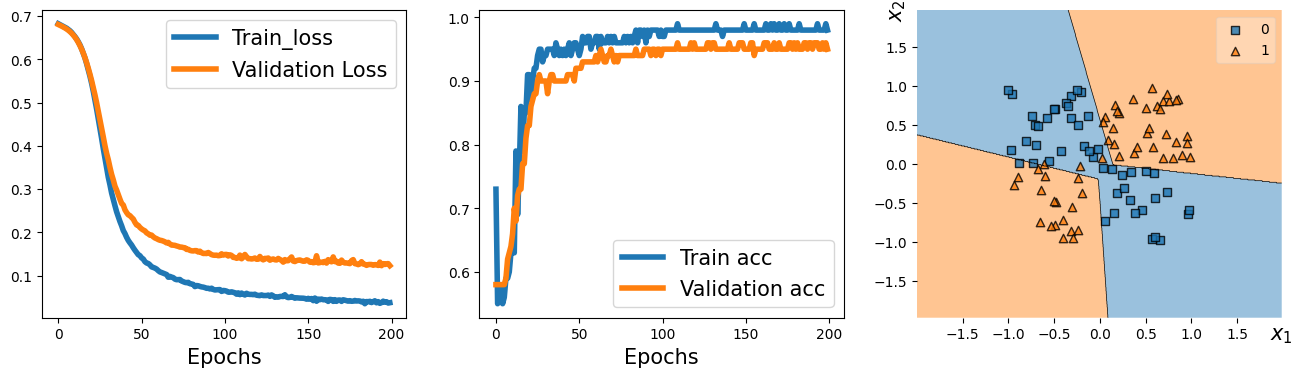

In [64]:
from mlxtend.plotting import plot_decision_regions
fig = plt.figure(figsize = (16,4))
ax = fig.add_subplot(1,3,1)
plt.plot(history[0], lw = 4)
plt.plot(history[1], lw = 4)
plt.legend(['Train_loss', 'Validation Loss'], fontsize = 15)
ax.set_xlabel('Epochs', fontsize= 15)
ax = fig.add_subplot(1,3,2)
plt.plot(history[2], lw = 4)
plt.plot(history[3], lw = 4)
plt.legend(['Train acc', 'Validation acc'], fontsize = 15)
ax.set_xlabel('Epochs', fontsize = 15)

ax = fig.add_subplot(1,3,3)
plot_decision_regions(X = x_valid.numpy(), y = y_valid.numpy().astype(np.integer),
                      clf=model)
ax.set_xlabel(r'$x_1$', size = 15)
ax.xaxis.set_label_coords(1,-0.025)
ax.set_ylabel(r'$x_2$',size =15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()


In [72]:
import pandas as pd
import tensorflow as tf

# 데이터셋 다운로드
dataset_path = tf.keras.utils.get_file(
    origin="https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",
    fname="auto-mpg.data"
)

# 열 이름 정의
columns_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']

# 데이터 불러오기
df = pd.read_csv(dataset_path, names=columns_names, na_values="?", comment='\t', sep=" ", skipinitialspace=True)

# 데이터 출력
print(df.head())


    MPG  Cylinders  Displacement  ...  Acceleration  Model Year  Origin
0  18.0          8         307.0  ...          12.0          70       1
1  15.0          8         350.0  ...          11.5          70       1
2  18.0          8         318.0  ...          11.0          70       1
3  16.0          8         304.0  ...          12.0          70       1
4  17.0          8         302.0  ...          10.5          70       1

[5 rows x 8 columns]


In [82]:
df = df.dropna()
df = df.reset_index(drop = True)
import sklearn
import sklearn.model_selection
df_train, df_test = sklearn.model_selection.train_test_split(
    df, train_size = 0.8, random_state = 1
)
train_stats = df_train.describe().transpose()
numeric_column_names = ['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration']
df_train_norm, df_test_norm = df_train.copy(), df_test.copy()
for col_name in numeric_column_names:
    mean = train_stats.loc[col_name, 'mean']
    std = train_stats.loc[col_name,'std']
    df_train_norm.loc[:,col_name] = (df_train_norm.loc[:,col_name] - mean) / std
    df_test_norm.loc[:,col_name] = (df_test_norm.loc[:,col_name] - mean)/std
df_train_norm.tail()


boundaries = torch.tensor([73,76,79])
v = torch.tensor(df_train_norm['Model Year'].values)
df_train_norm['Model Year Bucketed'] = torch.bucketize(v, boundaries, right = True)
numeric_column_names.append('Model Year Bucketed')

v = torch.tensor(df_test_norm['Model Year'].values)
df_test_norm['Model Year Bucketed'] = torch.bucketize(v, boundaries=boundaries, right = True)

from torch.nn.functional import one_hot
total_origin = len(set(df_train_norm['Origin']))
origin_encoded = one_hot(torch.from_numpy(
    df_train_norm['Origin'].values) % total_origin)
x_train_numeric = torch.tensor(df_train_norm[numeric_column_names].values)
x_train = torch.cat([x_train_numeric, origin_encoded],1).float()
origin_encoded = one_hot(torch.from_numpy(
    df_test_norm['Origin'].values) % total_origin)
x_test_numeric = torch.tensor(df_test_norm[numeric_column_names].values)
x_test = torch.cat([x_test_numeric, origin_encoded], 1).float()

y_train = torch.tensor(df_train_norm['MPG'].values).float()
y_test = torch.tensor(df_test_norm['MPG'].values).float()

/var/folders/yp/vp1ybtwd7dg99p8q67djzx_w0000gn/T/ipykernel_21166/2631022917.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.8243028   0.3511267  -0.8243028  -0.8243028  -0.8243028   1.52655621
  0.3511267  -0.8243028  -0.8243028  -0.8243028   0.3511267  -0.8243028
  0.3511267   1.52655621  1.52655621  1.52655621  0.3511267   1.52655621
 -0.8243028   0.3511267   1.52655621 -0.8243028  -0.8243028   0.3511267
 -0.8243028  -0.8243028  -0.8243028   0.3511267  -0.8243028   1.52655621
  0.3511267  -0.8243028   0.3511267  -0.8243028  -0.8243028   1.52655621
 -0.8243028   1.52655621  1.52655621 -0.8243028  -0.8243028  -0.8243028
 -0.8243028   0.3511267  -0.8243028   1.52655621 -0.8243028  -0.8243028
  1.52655621 -0.8243028  -0.8243028  -0.8243028   1.52655621  1.52655621
  0.3511267   0.3511267   1.52655621 -0.8243028  -0.8243028   1.52655621
  1.52655621 -0.8243028  -0.8243028   0.3511267   1.52655621 -0.8243028
 

In [88]:
train_ds = TensorDataset(x_train, y_train)
batch_size = 8
torch.manual_seed(1)
train_dl = DataLoader(train_ds, batch_size, shuffle = True)
hidden_units = [8,4]
input_size = x_train.shape[1]
all_layers = []
for hidden_unit in hidden_units:
    layer = nn.Linear(input_size, hidden_unit)
    all_layers.append(layer)
    all_layers.append(nn.ReLU())
    input_size = hidden_unit
all_layers.append( nn.Linear(hidden_units[-1],1) )
model = nn.Sequential(*all_layers)
model
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

epochs = 200
log_epochs = 20

for epoch in range(epochs):
    loss_hist_train = 0
    for x_batch, y_batch  in train_dl:
        pred = model(x_batch)[:,0]
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_hist_train += loss.item()
    if epoch % log_epochs == 0:
        print(f'에포크 : {epoch}, 손실 : {loss_hist_train/len(train_dl):.4f}')



에포크 : 0, 손실 : 530.7308
에포크 : 20, 손실 : 7.8103
에포크 : 40, 손실 : 7.7546
에포크 : 60, 손실 : 6.9081
에포크 : 80, 손실 : 6.8482
에포크 : 100, 손실 : 6.7144
에포크 : 120, 손실 : 6.4509
에포크 : 140, 손실 : 7.1134
에포크 : 160, 손실 : 6.4428
에포크 : 180, 손실 : 6.2078


In [91]:
with torch.no_grad():
    pred = model(x_test.float())[:,0]
    loss = loss_fn(pred, y_test)
    print(f"테스트 MSE : {loss.item():.4f}")
    print(f'test MAE : {nn.L1Loss()(pred, y_test).item():.4f}')

테스트 MSE : 13.1923
test MAE : 2.6506
